# Common Emitter Amplifier - Simple Biasing with Grounded Emitter

A study and useful calculator for a "simply biased" Common Emitter amplifier with grounded emitter.


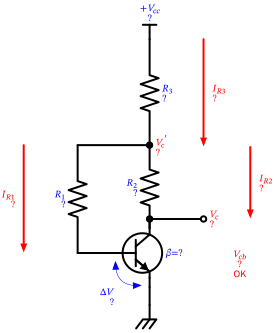

In [41]:
import math
from collections import defaultdict

import eseries
import pint

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import plotly.io as pio
import schemdraw as schem
import schemdraw.elements as el
import texttable as tt
from IPython.display import HTML, Latex, display
from sympy import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Support rendering plots in github
pio.renderers.default = "jupyterlab+png"
schem.use("svg")
schem.config(fontsize=10)

ureg = pint.UnitRegistry()


def draw_ce_bias_annotated(anno_stage="", vals=defaultdict(lambda: "?")):

    d = schem.Drawing()

    d.push()
    d += (R1 := el.Resistor().label(f"$R_1$\n{vals['R_1']}", color="blue")).up()
    d += el.Line().length(2).right()
    d += el.Dot().label(f"$V^'_c$\n{vals['V_pc']}", loc="right", color="red")
    d.pop()
    d += el.Line().right().length(0.75)
    d += el.Line().length(0.5)
    d += (TR1 := el.BjtNpn(circle=True).label(f"$\\beta$={vals['beta']}", color="blue"))

    d += (
        R2 := el.Resistor()
        .label(f"$R_2$\n{vals['R_2']}", color="blue")
        .up()
        .at(TR1.collector)
        .length(2.25)
    )
    d += (R3 := el.Resistor().label(f"$R_3$\n{vals['R_3']}", color="blue", loc="bot"))
    d += el.Vdd().label("$+V_{cc}$" + f"\n{vals['V_cc']}", color="blue")

    d += el.Line().length(0.25).up().at(TR1.collector)
    d += el.Dot()
    d += el.Line().right().length(1.5)
    d += el.Dot(open=True).label(f"$V_c$\n{vals['V_c']}", loc="right", color="red")

    d += el.Line().length(0.25).down().at(TR1.emitter)
    d.push()
    d += (
        el.Arc2(arrow="<->", radius=0.6, color="blue")
        .linewidth(0.5)
        .at(TR1.emitter, dx=-0.2, dy=-0.2)
        .to(TR1.base, dx=-0.2, dy=-0.2)
        .label("$\\Delta V$" + f"\n{vals['Delta_V']}", ofst=(-0.25, -0.25), fontsize=10)
    )
    d.pop()
    d += el.Line().length(0.5)
    d += el.GroundChassis()

    d += el.Gap().at(R3.end).right().length(1.5)
    d += (
        el.Arrow(color="red")
        .down()
        .label("$I_{R3}$" + f"\n{vals['I_R3']}", color="red", loc="bot")
    )

    d += el.Gap().at(R2.end).right().length(2.8)
    d += (
        el.Arrow(color="red")
        .down()
        .label("$I_{R2}$" + f"\n{vals['I_R2']}", color="red", loc="bot")
        .length(2)
    )

    d += el.Gap().at(R1.end).left().length(1.5)
    d += (
        el.Arrow(color="red")
        .down()
        .label("$I_{R1}$" + f"\n{vals['I_R1']}", color="red", loc="top")
    )

    d += el.Gap().at(R2.start).right().length(2.5)
    sat_msg = "OK"
    if vals["V_cb"].startswith("-"):
        sat_msg = "WARNING: Saturation!"
    # d += el.Gap().down().length(1.5)
    d += (
        el.Gap()
        .down()
        .length(2)
        .label("$V_{cb}$\n" + f"{vals['V_cb']}\n{sat_msg}", color="red", loc="bot")
    )

    return d


display(draw_ce_bias_annotated().draw())

## The Set of Linear Equations

$$
V_{c} = - I_{R2} R_{2} + V_{pc}
$$
$$
I_{R1} = \frac{- \Delta_{V} + V_{pc}}{R_{1}}
$$
$$
I_{R2} = I_{R1} \beta
$$
$$
I_{R3} = \frac{V_{cc} - V_{pc}}{R_{3}}
$$
$$
V_{pc} = - I_{R3} R_{3} + V_{cc}
$$
$$
I_{R3} = I_{R1} + I_{R2}
$$



In [12]:
def calc_CE_gndEmitter_simple_bias():
    R_1, R_2, R_3 = symbols("R_1 R_2 R_3")
    beta, Delta_V = symbols("beta Delta_V")
    I_R1, I_R2, I_R3 = symbols("I_R1 I_R2 I_R3")
    V_c, V_cc, V_pc, V_cb = symbols("V_c V_cc V_pc V_cb")

    eqs = [
        Eq(V_c, V_pc - I_R2 * R_2),
        Eq(I_R1, (V_pc - Delta_V) / R_1),
        Eq(I_R2, beta * I_R1),
        Eq(I_R3, (V_cc - V_pc) / R_3),
        Eq(V_pc, V_cc - I_R3 * R_3),
        Eq(I_R3, I_R2 + I_R1),
        Eq(V_cb, V_c - Delta_V),
    ]

    solve4 = (I_R1, I_R2, I_R3, V_pc, V_c, V_cb)
    res = solve(eqs, solve4, dict=True)[0]

    print(f">>> Solved for {solve4} >>>")
    for s in solve4:
        display(f"{s}", Eq(s, res[s]))

    return res


simple_bias_system_eqs = calc_CE_gndEmitter_simple_bias()

>>> Solved for (I_R1, I_R2, I_R3, V_pc, V_c, V_cb) >>>


'I_R1'

Eq(I_R1, (-Delta_V + V_cc)/(R_1 + R_3*beta + R_3))

'I_R2'

Eq(I_R2, (-Delta_V*beta + V_cc*beta)/(R_1 + R_3*beta + R_3))

'I_R3'

Eq(I_R3, (-Delta_V*beta - Delta_V + V_cc*beta + V_cc)/(R_1 + R_3*beta + R_3))

'V_pc'

Eq(V_pc, (Delta_V*R_3*beta + Delta_V*R_3 + R_1*V_cc)/(R_1 + R_3*beta + R_3))

'V_c'

Eq(V_c, (Delta_V*R_2*beta + Delta_V*R_3*beta + Delta_V*R_3 + R_1*V_cc - R_2*V_cc*beta)/(R_1 + R_3*beta + R_3))

'V_cb'

Eq(V_cb, (-Delta_V*R_1 + Delta_V*R_2*beta + R_1*V_cc - R_2*V_cc*beta)/(R_1 + R_3*beta + R_3))

In [3]:
def CE_gndEmitter_simple_bias(values):
    show_values = defaultdict(lambda: "n/a")
    for k in values.keys():
        show_values[k] = f"{(values[k]):.1f}"
        if k.startswith("R"):
            show_values[k] = f"{(values[k]*ureg.ohms):.1f~#P}"
        elif k.startswith("V_") or k.endswith("_V"):
            show_values[k] = f"{(values[k]*ureg.volts):.3f~#P}"

    for s in simple_bias_system_eqs:
        ans = simple_bias_system_eqs[s].subs(values)
        str_val = f"{float(ans):.3f}"
        if str(s).startswith("V"):
            str_val = f"{(float(ans)*ureg.volts):.3f~#P}"
        elif str(s).startswith("I"):
            str_val = f"{(float(ans)*ureg.amperes):.3f~#P}"
        elif str(s).startswith("P"):
            str_val = f"{(float(ans)*ureg.watts):.3f~#P}"
        show_values[f"{s}"] = f"{str_val}"

    display(draw_ce_bias_annotated(vals=show_values).draw())

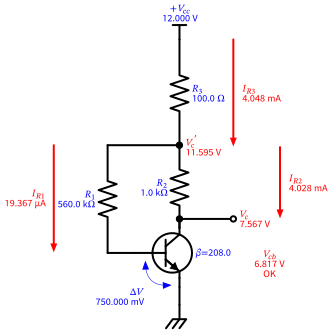

In [42]:
CE_gndEmitter_simple_bias(
    dict(
        R_1=560000,
        R_2=1000,
        R_3=100,
        beta=208,
        Delta_V=0.75,
        V_cc=12,
    )
)

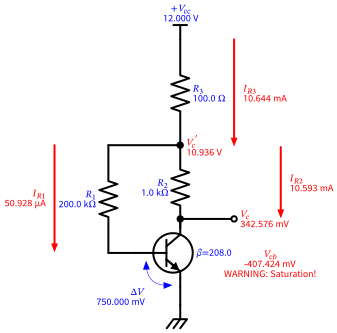

In [43]:
CE_gndEmitter_simple_bias(
    dict(
        R_1=200000,
        R_2=1000,
        R_3=100,
        beta=208,
        Delta_V=0.75,
        V_cc=12,
    )
)